In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## BIRCH - balanced iterative clustering using hierarchies

#### Cechy BIRCH:
* służy do **wstępnego** pogrupowania danych na dużo małych i bardzo spójnych skupień (następnie bierzemy środki tych klastrów, i używamy innego algorytmu klastrowania na nich)
* algorytm jest bardzo wydajny, przechodzimy przez dane tylko raz
* algorytm może zwrócić różne wyniki w zależności od kolejności danych 

#### Parametry:
* T(treshold), radius upper bound, (radius  = SREDNIA odleglosc punktow od srodka, a nie maksymalna, wiec inny promien niz klasyczny)
* B (branching factor): maksymalna dopuszczalna liczba gałęzi wychodząco z jednego węzła

In [2]:
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs

# Zad.
Wygenerujmy dane zawierajęce 10 spójnych gróp.

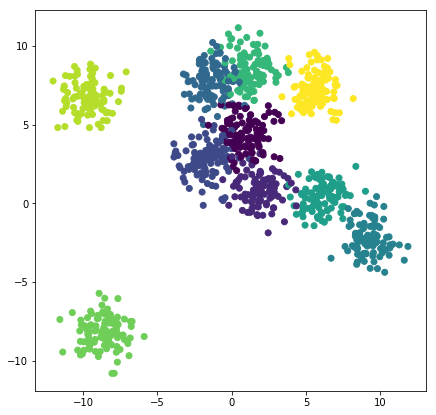

In [3]:
data, labels =  make_blobs(1000, centers = 10, random_state=0, shuffle=True)
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], c = labels, cmap = 'viridis')
plt.show()

# Zad.
Wykonaj algorytm  Birch

In [4]:
b = Birch(threshold = 1, n_clusters= None)
b.fit(data)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
   threshold=1)

In [5]:
np.unique(set(b.labels_))

array([{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}],
      dtype=object)

In [6]:
b.subcluster_centers_

array([[  0.65699291,   8.00069438],
       [ -1.35867618,   2.55794936],
       [  0.3614498 ,   5.46440057],
       [  5.58257078,   0.29396862],
       [  0.25882045,   0.80899775],
       [  2.15510663,   2.1101151 ],
       [  7.31950896,   0.40489509],
       [  5.97039481,   7.91377766],
       [ -8.01415614,  -8.15111027],
       [ -9.71866948,   7.4970512 ],
       [  9.13401918,  -1.84849862],
       [  1.94821493,   4.69619738],
       [  1.94787564,   0.31134485],
       [  0.21674859,   3.64408369],
       [-10.11383596,   5.57292216],
       [ -1.50053598,   7.38181111],
       [  4.73076823,   6.64346277],
       [  5.9722929 ,   6.75365535],
       [ -9.89306681,  -8.44840359],
       [  2.19256109,   8.50320131],
       [ -8.6473362 ,   6.47515474],
       [ -8.78313524,  -6.79335004],
       [  4.15524325,   0.38318576],
       [  0.93226682,  10.06432171],
       [  6.20390339,   1.32105268],
       [  5.1467883 ,   9.08128783],
       [ -1.249771  ,   9.09356363],
 

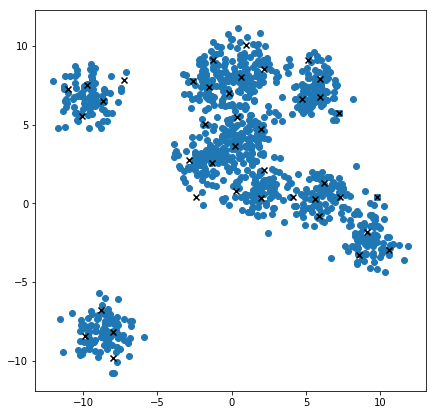

In [7]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1])
plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1], c = 'black', marker = 'x')
plt.show()

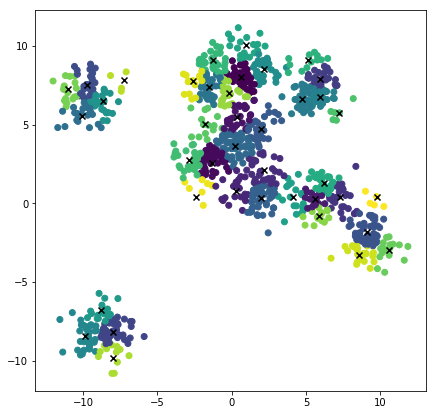

In [8]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], c = b.labels_)
plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1], c = 'black', marker = 'x')
plt.show()

# Zad.
Wykonaj algorytm k-means na wyniku Birch.

In [9]:
from sklearn.cluster import KMeans

km = KMeans(3)

b = Birch(1, n_clusters = km) # n_clusters = algorithm means algorithm will be used 
                                     # to cluster subclusters obtained from Birch
b.fit(data)

Birch(branching_factor=50, compute_labels=True, copy=True,
   n_clusters=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0),
   threshold=1)

In [10]:
km.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1])

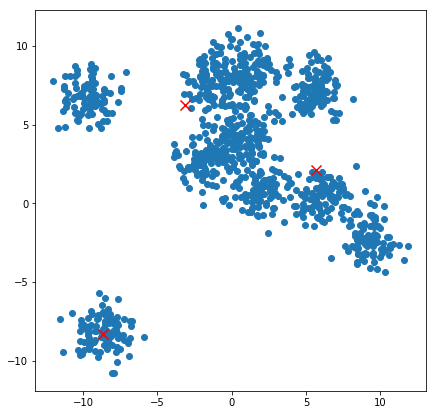

In [11]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1])
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 100, c = 'red', marker = 'x')
plt.show()

In [12]:
labels_all = km.predict(data)

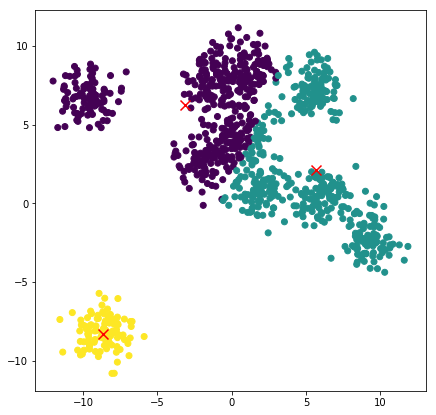

In [13]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], c=labels_all)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 100, c = 'red', marker = 'x')
plt.show()

## 10^5 examples

In [14]:
N_CLUSTERS = 500
data, labels = make_blobs(100000, centers= N_CLUSTERS, cluster_std = 4, center_box = [0,1000], random_state = 0, shuffle = True)

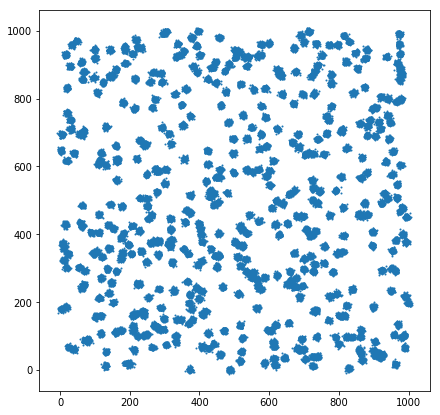

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], s = 1)
plt.show()

In [22]:
b  = Birch(threshold = 4, n_clusters = 500, branching_factor = 1000) #jesli ustawimy n_clusters to Aglomerative clustering zostanie użyty dl grupowania do n_clusters grup
res = b.fit_predict(data)

In [18]:
len(b.subcluster_centers_)

2978

In [19]:
set(b.labels_)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


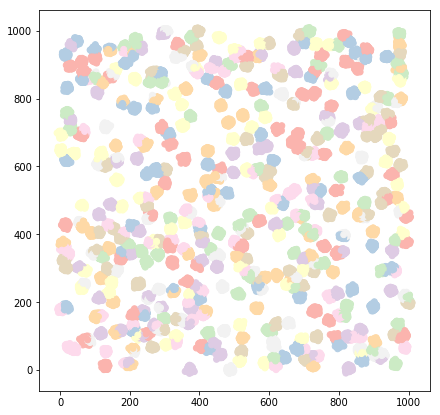

In [20]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], c = b.labels_, cmap = 'Pastel1')
#plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1], c = 'black', marker = 'x')
plt.show()

# MiniBatch Kmeans

   * Algorytm pobiera małe partie zbioru danych (losowo wybrane) dla każdej iteracji.

   * Następnie przypisuje klaster do każdego punktu danych w grupie, w zależności od poprzednich lokalizacji centroidów klastra.

   * Następnie aktualizuje położenie centroidów klastra na podstawie nowych punktów z partii. 

   * Aktualizacja wykonywana jest za pomocą metody gradientowwj, która jest znacznie szybsza niż zwykła aktualizacja Batch K-Means. 
   
   
http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf   

In [35]:
from sklearn.cluster import MiniBatchKMeans, KMeans

In [36]:
m_n_k_means = MiniBatchKMeans(n_clusters=500, batch_size= 10000)
m_n_k_means.fit(data)

MiniBatchKMeans(batch_size=10000, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10,
        n_clusters=500, n_init=3, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)

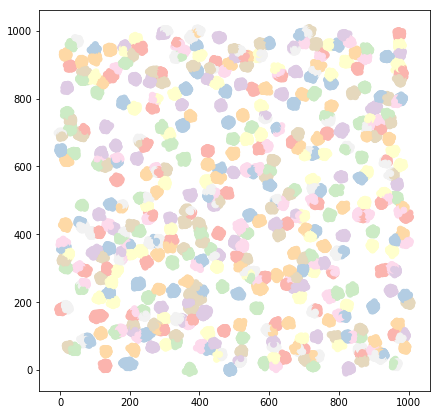

In [37]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], c = m_n_k_means.labels_, cmap = 'Pastel1')
#plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1], c = 'black', marker = 'x')
plt.show()